In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

데이터셋: https://www.chainportal.co.kr/portinfo/nexacro/index.html?screenid=screen_info (부산항만공사 제공) -> 전반적인 거 같다
          http://info.bptc.co.kr:9084/content/sw/frame/berth_status_text_frame_sw_kr.jsp (이 역시도 부산항만공사 데이터) -> 일본, 중국 선택해서 볼 수 있다
- 선석배정현황(T)

In [2]:
# check = pd.read_excel("선석배정현황(T)_20230520.xlsx")
# check.head()

In [3]:
# check.dropna(inplace=True)
# check.reset_index(inplace = True)
# check.drop(["번호", "index"], axis = 1, inplace = True)
# check.head()

In [4]:
# def to_datetime(e, s):
#     e = datetime.strptime(e, "%Y/%m/%d %H:%M")
#     s = datetime.strptime(s, "%Y/%m/%d %H:%M")
#     return e, s
# work = []
# for i in range(len(check)):
#     e = check["출항예정일시"][i]
#     s = check["접안예정일시"][i]
#     e, s = to_datetime(e,s)
#     t = round((e.timestamp() - s.timestamp()) / (60*60), 0)
#     work.append(t)
# work = pd.Series(work)
# check = pd.concat([check, work], axis = 1)
# check = check.rename(columns = {0: "work"})

In [5]:
# # 터미널에 따라, 선석에 따라, 선사에 따라 달라질 것으로 1차적으로는 생각하고 변수로 두고 예측.
# train = check.loc[:, ["터미널", "선석", "선사", "양하수량", "적하수량", "이적수량", "work"]]
# train

In [6]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for idx in ["터미널", "선석", "선사"]:
#     le.fit(train[idx])
#     train[idx] = le.transform(train[idx])

In [7]:
# print("터미널의 종류: {}".format(len(np.unique(train["터미널"]))))
# print("선석의 종류: {}".format(len(np.unique(train["선석"]))))
# print("선사의 종류: {}".format(len(np.unique(train["선사"]))))

In [8]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error
# target = train["work"]
# train = train.drop("work", axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 42)
# gbr = GradientBoostingRegressor(random_state = 42)

In [9]:
# gbr.fit(X_train, y_train)
# pred = gbr.predict(X_test)

In [10]:
# np.sqrt(mean_squared_error(pred, y_test))

항로: 일본, 중국 / 선석배정현황 데이터(부산항 터미널 주식회사)
- 출처: http://info.bptc.co.kr:9084/content/sw/frame/berth_status_text_frame_sw_kr.jsp

In [11]:
# 2022년 한 해 일본 데이터
# 하나는 감만 터미널, 하나는 신선대 터미널
a_jpn = pd.read_csv("berth_status_text_sw_jpn_1.txt", encoding = "cp949")
a_jpn_2 = pd.read_csv("berth_status_text_sw_jpn_2.txt", encoding = "cp949")

In [12]:
a_jpn_2

,선석별 모선 배정 현황 (출력)
0,조회기간 : 20220101~20221231
1,No.\t선석\t모선항차\t선박명\t접안\t선사\t입항예정일시\t입항일시\t출항예정...
2,1\t8\tHHAU-1\tHEUNG-A ULSAN\tS\tHAS\t2022/01/0...
3,2\t6\tPHAR-1\tPANCON HARMONY\tS\tPCL\t2022/01/...
4,3\t8\tPCTJ-1\tPACIFIC TIANJIN\tS\tHAS\t2022/01...
...,...
225,224\t8\tPSUC-37\tPANCON SUCCESS\tS\tPCL\t2022/...
226,225\t6\tSKVL-33\tSINOKOR VLADIVOSTOK\tS\tSKR\t...
227,226\t8\tPCSG-62\tPACIFIC SINGAPORE\tS\tHAS\t20...
228,227\t8\tATSH-7\tATLANTIC SOUTH\tS\tSKR\t2022/1...


In [13]:
def chg_df(d):
    t = d.split("\t")
    return t

In [14]:
to_df = []
for i in range(1, len(a_jpn)):
    x = a_jpn["선석별 모선 배정 현황 (출력)"][i]
    to_df.append(chg_df(x))
to_df_2 = []
for i in range(1, len(a_jpn_2)):
    x = a_jpn_2["선석별 모선 배정 현황 (출력)"][i]
    to_df_2.append(chg_df(x))

In [15]:
# 데이터프레임 완성
def to_DF(df):
    df = pd.DataFrame(df)
    df = df.rename(columns = df.iloc[0,:])
    df.drop(0, axis = 0, inplace = True)
    df.drop(["전배", None], axis = 1, inplace = True)
    df.reset_index(inplace = True)
    df.drop(["index", "No."], axis = 1, inplace = True)
    return df
df = to_DF(to_df)
df_2 = to_DF(to_df_2)

In [16]:
def reset_idx(df):
    df.reset_index(inplace=True)
    df.drop(['index'], axis = 1, inplace = True)
    return df
df = pd.concat([df, df_2], axis = 0)
# 수리 선박은 필요없으므로 drop
df = reset_idx(df)
for i in range(len(df)):
    if df.loc[i, "출항일시"] == "":
        df.loc[i, "출항일시"] = np.nan
df.dropna(inplace = True)
df = reset_idx(df)

In [17]:
df

,선석,모선항차,선박명,접안,선사,입항예정일시,입항일시,출항예정일시,출항일시,반입마감일시,양하,선적,S/H,항로
0,2,KSCM-1,SUNNY COSMOS,P,KMD,2022/01/01 02:00,2022/01/01 00:50,2022/01/01 20:00,2022/01/01 20:00,2021/12/31 19:00,234,264,0,NTP
1,1,JPPR-1,PEGASUS PRIME,S,DYS,2022/01/01 02:00,2022/01/01 01:20,2022/01/01 22:00,2022/01/01 21:00,2021/12/31 19:00,271,270,0,HS2
2,1,SKNT-1,SINOKOR NIIGATA,S,SKR,2022/01/01 01:00,2022/01/01 00:30,2022/01/02 02:00,2022/01/02 01:00,2021/12/31 18:00,214,143,0,SETO4
3,1,PCSG-1,PACIFIC SINGAPORE,S,SKR,2022/01/02 04:00,2022/01/02 03:40,2022/01/02 16:00,2022/01/02 16:00,2022/01/01 18:00,171,0,0,SKX
4,4,HASR-1,HEUNG-A SARAH,S,HAS,2022/01/02 00:00,2022/01/02 00:00,2022/01/02 20:00,2022/01/02 20:30,2022/01/01 14:00,428,257,0,THS5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,8,PSUC-37,PANCON SUCCESS,S,PCL,2022/12/18 12:00,2022/12/18 12:00,2022/12/19 02:00,2022/12/19 02:00,2022/12/17 19:00,329,294,0,KJP
1221,6,SKVL-33,SINOKOR VLADIVOSTOK,S,SKR,2022/12/20 19:00,2022/12/20 19:10,2022/12/21 06:00,2022/12/21 06:00,2022/12/19 19:00,237,114,0,THS2
1222,8,PCSG-62,PACIFIC SINGAPORE,S,HAS,2022/12/21 19:00,2022/12/21 18:30,2022/12/22 06:00,2022/12/22 06:00,2022/12/21 09:00,185,0,0,SETO3
1223,8,ATSH-7,ATLANTIC SOUTH,S,SKR,2022/12/26 22:00,2022/12/26 21:45,2022/12/27 08:00,2022/12/27 08:00,2022/12/26 15:00,151,141,0,THS4


선사별 숫자 역순으로 정렬(기준: 2022년 일본)
- HAS: 흥아해운(주)
- SKR: 장금상선(주)
- KMD: 고려해운(주)
- NSL: 남성해운(주)
- DJS: 동진상선
- PCL: 범주해운(주)
- DYS: 동영해운(주)
- POL: 팬오션(주)

In [18]:
np.unique(df["선사"], return_counts = True)

(array(['DJS', 'DYS', 'HAS', 'KMD', 'NSL', 'PCL', 'POL', 'SKR'],
       dtype=object),
 array([ 98,  44, 453, 110, 100,  47,   9, 364], dtype=int64))

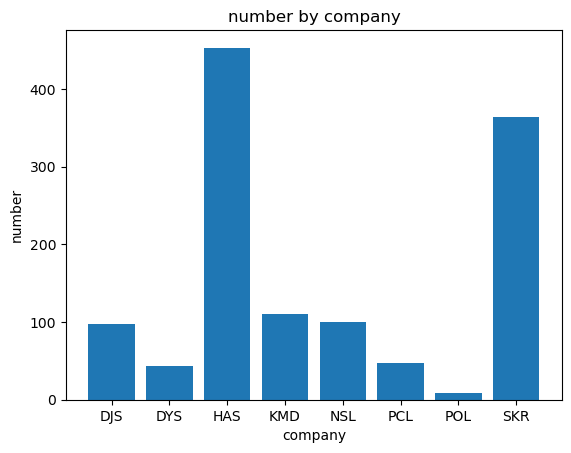

In [19]:
import matplotlib.pyplot as plt
g = np.unique(df["선사"], return_counts = True)
x = g[0]
y = g[1]
plt.bar(x, y)
plt.title('number by company')
plt.xlabel('company')
plt.ylabel('number')
plt.show()

In [20]:
# 2022년 일본으로의 항로에 관측이 많이된 선박을 추렸습니다.(부산항 기준)
vessel_name = np.unique(df["선박명"], return_counts = True)
d = dict()
for i in range(len(vessel_name[0])):
    d[vessel_name[0][i]] = vessel_name[1][i]
d = sorted(d.items(), key = lambda x : x[1], reverse = True)

In [21]:
v_n, n_v = [], []
for i in range(len(d)):
    v_n.append(d[i][0])
    n_v.append(d[i][1])
vessel = pd.DataFrame([v_n, n_v]).transpose()
vessel = vessel.rename(columns = {0: "name", 1: "count"})
vessel.to_csv("2022_일본행선박.csv")

In [22]:
# 입항예정일시, 입항일시, 출항예정일시, 출항일시 모두 datetime으로 형 변환 및 작업완료시간과 출항
# 그리고 양하, 선적을 합한 값을 하나의 work column에 넣는다
df["delay"] = None
df["total"] = None
df["work"] = None
def chg_type(df):
    for i in range(len(df)):
        df.iloc[i, 5] = datetime.strptime(df.iloc[i, 5], "%Y/%m/%d %H:%M")
        df.iloc[i, 6] = datetime.strptime(df.iloc[i, 6], "%Y/%m/%d %H:%M")
        df.iloc[i, 7] = datetime.strptime(df.iloc[i, 7], "%Y/%m/%d %H:%M")
        df.iloc[i, 8] = datetime.strptime(df.iloc[i, 8], "%Y/%m/%d %H:%M")
        # 7이 출항 예정 일시, 8이 실제 출항 일시이다. 예정 일시보다 출항이 늦었다면 delay.
        df.iloc[i, 10] = int(df.iloc[i, 10])
        df.iloc[i, 11] = int(df.iloc[i, 11])
        df.loc[i, "total"] = df.iloc[i, 10] + df.iloc[i, 11]
        # 출항 일시와 입항 일시의 차이만큼 작업을 한 것으로 간주
        df.loc[i, 'work'] = round((df.iloc[i, 8].timestamp() - df.iloc[i, 6].timestamp())/(60*60), 1)
        if df.iloc[i, 8].timestamp() - df.iloc[i, 7].timestamp() > 0:
            df.loc[i, "delay"] = 1
        else:
            df.loc[i, "delay"] = 0
    return df

In [23]:
df = chg_type(df)

In [24]:
# delay 상황이 관측된다.
# 10% 안쪽이긴 하지만 관측된다
np.unique(df["delay"], return_counts = True)

(array([0, 1], dtype=object), array([1122,  103], dtype=int64))

완성된 dataframe
- work: 실제 출항일시와 입항일시에 대한 차이를 바탕으로 작업 시간이라 간주 하고 계산. 작업 시간은 고려해야 될 게 많지만 단순하게 입항했을때 부터 다시 출항할 때까지의 시간을 작업 시간이라 간주했습니다.
- delay: 실제 출항이 출항예정일시보다 늦은 경우.
- total: 양하 + 선적(총 물량) -> 추후에 선사 별, 선박 별로 데이터셋을 구성한다면 과거의 스케줄 정보를 바탕으로 기댓값을 작업량 관련한 상수로 기입해서 지수 계산에 반영하는 방향은 가능하지 않을까요?

In [25]:
# delay라 해봤자 
delayed = df[df["delay"] == 1]
x = -9999999999
for i in range(len(delayed)):
    x = max(x, (delayed.iloc[i, 8].timestamp() - delayed.iloc[i, 7].timestamp()) / (60*60))
x

9.0

In [26]:
# 항로
np.unique(df["항로"], return_counts = True)

(array(['BJ1', 'BKH', 'BSS2', 'BTS', 'CJ1', 'CKX1', 'ETC', 'HPS1', 'HS2',
        'ISX', 'JEK1', 'JEK2', 'JSW1', 'JSW2', 'KCJ', 'KHP', 'KHX1',
        'KJH1', 'KJK', 'KJP', 'KJS1', 'KJS2', 'KJS7', 'KRX', 'KXS1', 'MSX',
        'NBS', 'NCK', 'NTP', 'PD2', 'PKX', 'PVS3', 'SETO3', 'SETO4', 'SKX',
        'STS', 'THS2', 'THS4', 'THS5'], dtype=object),
 array([ 51,  52,  38,   3,  16,   3,   2,   1,  18,  78,  10,  40,  39,
         40,  31,  13,  13,  18,  49,  47,  29,  50,  20,   1,  18,  93,
          9,  28,  27,   3,  89,   1,  43,  46, 103,   1,  36,  27,  39],
       dtype=int64))

In [28]:
df[df["delay"] == 1]

,선석,모선항차,선박명,접안,선사,입항예정일시,입항일시,출항예정일시,출항일시,반입마감일시,양하,선적,S/H,항로,delay,total,work
4,4,HASR-1,HEUNG-A SARAH,S,HAS,2022-01-02 00:00:00,2022-01-02 00:00:00,2022-01-02 20:00:00,2022-01-02 20:30:00,2022/01/01 14:00,428,257,0,THS5,1,685,20.5
6,1,HHTK-1,HEUNG-A TOKYO,S,HAS,2022-01-03 22:00:00,2022-01-03 22:10:00,2022-01-04 08:00:00,2022-01-04 09:00:00,2022/01/03 10:00,0,195,0,ISX,1,195,10.8
7,2,HTVY-1,HAKATA VOYAGER,S,HAS,2022-01-04 01:00:00,2022-01-04 01:00:00,2022-01-04 12:00:00,2022-01-04 12:20:00,2022/01/03 10:00,0,267,0,HS2,1,267,11.3
8,4,NSSK-2,STAR SKIPPER,P,NSL,2022-01-04 16:00:00,2022-01-04 15:30:00,2022-01-05 10:00:00,2022-01-05 11:00:00,2022/01/03 19:00,0,470,0,BKH,1,470,19.5
11,1,PCSG-2,PACIFIC SINGAPORE,S,SKR,2022-01-05 19:00:00,2022-01-05 18:50:00,2022-01-06 02:00:00,2022-01-06 02:05:00,2022/01/04 20:00,0,179,0,SKX,1,179,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,6,PSUC-27,PANCON SUCCESS,S,PCL,2022-09-28 16:00:00,2022-09-28 16:25:00,2022-09-29 14:00:00,2022-09-29 14:10:00,2022/09/27 19:00,413,406,0,KJP,1,819,21.8
1177,6,NGTR-29,NAGOYA TRADER,S,SKR,2022-10-19 02:00:00,2022-10-19 02:00:00,2022-10-19 21:00:00,2022-10-19 21:10:00,2022/10/18 13:00,343,324,0,KXS1,1,667,19.2
1179,6,HAJN-26,HEUNG-A JANICE,S,HAS,2022-10-21 08:00:00,2022-10-21 07:50:00,2022-10-21 18:00:00,2022-10-21 20:00:00,2022/10/20 22:00,216,0,0,THS2,1,216,12.2
1191,6,ATSH-2,ATLANTIC SOUTH,S,HAS,2022-11-09 09:00:00,2022-11-09 08:40:00,2022-11-09 15:00:00,2022-11-10 00:00:00,2022/11/08 23:00,270,0,0,THS2,1,270,15.3


- 문제점
    - 2023년에 부산항 북항에 해당하는 감만, 신선대 터미널에 일본으로의 출입항하는 선박 데이터가 2022년에 비하면 아예 없다
    - 혹시 부산항이 아닌 부산신항에 포인트를 맞춰야 하는 건지 생각해봐야 할 것 같습니다.
- 스케줄 정보
    - 잘 활용하면 작업 시간의 기댓값을 추후에 활용할 수 있지 않을까 싶습니다.
    - 여기서 대략적으로 파악 가능한 delay의 정도는 안 심한 것 같습니다.

,선석,모선항차,선박명,접안,선사,입항예정일시,입항일시,출항예정일시,출항일시,반입마감일시,양하,선적,S/H,항로,delay,total,work
0,2,KSCM-1,SUNNY COSMOS,P,KMD,2022-01-01 02:00:00,2022-01-01 00:50:00,2022-01-01 20:00:00,2022-01-01 20:00:00,2021/12/31 19:00,234,264,0,NTP,0,498,19.2
1,1,JPPR-1,PEGASUS PRIME,S,DYS,2022-01-01 02:00:00,2022-01-01 01:20:00,2022-01-01 22:00:00,2022-01-01 21:00:00,2021/12/31 19:00,271,270,0,HS2,0,541,19.7
2,1,SKNT-1,SINOKOR NIIGATA,S,SKR,2022-01-01 01:00:00,2022-01-01 00:30:00,2022-01-02 02:00:00,2022-01-02 01:00:00,2021/12/31 18:00,214,143,0,SETO4,0,357,24.5
3,1,PCSG-1,PACIFIC SINGAPORE,S,SKR,2022-01-02 04:00:00,2022-01-02 03:40:00,2022-01-02 16:00:00,2022-01-02 16:00:00,2022/01/01 18:00,171,0,0,SKX,0,171,12.3
4,4,HASR-1,HEUNG-A SARAH,S,HAS,2022-01-02 00:00:00,2022-01-02 00:00:00,2022-01-02 20:00:00,2022-01-02 20:30:00,2022/01/01 14:00,428,257,0,THS5,1,685,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,8,PSUC-37,PANCON SUCCESS,S,PCL,2022-12-18 12:00:00,2022-12-18 12:00:00,2022-12-19 02:00:00,2022-12-19 02:00:00,2022/12/17 19:00,329,294,0,KJP,0,623,14.0
1221,6,SKVL-33,SINOKOR VLADIVOSTOK,S,SKR,2022-12-20 19:00:00,2022-12-20 19:10:00,2022-12-21 06:00:00,2022-12-21 06:00:00,2022/12/19 19:00,237,114,0,THS2,0,351,10.8
1222,8,PCSG-62,PACIFIC SINGAPORE,S,HAS,2022-12-21 19:00:00,2022-12-21 18:30:00,2022-12-22 06:00:00,2022-12-22 06:00:00,2022/12/21 09:00,185,0,0,SETO3,0,185,11.5
1223,8,ATSH-7,ATLANTIC SOUTH,S,SKR,2022-12-26 22:00:00,2022-12-26 21:45:00,2022-12-27 08:00:00,2022-12-27 08:00:00,2022/12/26 15:00,151,141,0,THS4,0,292,10.2
